In [7]:
import requests

url = "https://en.wikipedia.org/wiki/Artificial_intelligence"

text = requests.get(url).content.decode("utf-8")
text[:1000]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Artificial intelligence - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled ve

In [8]:
from html.parser import HTMLParser


class MyHTMLParser(HTMLParser):
    script = False
    res = ""

    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True

    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False

    def handle_data(self, data):
        if str.strip(data) == "" or self.script:
            return
        self.res += " " + data.replace("[ edit ]", "")


parser = MyHTMLParser()
parser.feed(text)

text = parser.res
text[:1000]

' Artificial intelligence - Wikipedia Jump to content Main menu Main menu move to sidebar hide \n\t\tNavigation\n\t Main page Contents Current events Random article About Wikipedia Contact us Donate \n\t\tContribute\n\t Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Create account Log in Personal tools Create account Log in \n\t\tPages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Goals Toggle Goals subsection 1.1 Reasoning and problem-solving 1.2 Knowledge representation 1.3 Planning and decision-making 1.4 Learning 1.5 Natural language processing 1.6 Perception 1.7 Social intelligence 1.8 General intelligence 2 Techniques Toggle Techniques subsection 2.1 Search and optimization 2.1.1 State space search 2.1.2 Local search 2.2 Logic 2.3 Probabilistic methods for uncertain reasoning 2.4 Classifiers and statistical learning methods 2.5 Artificial neural networks 2.6 Deep learning 2.7 GPT 2.8 Specialize

In [11]:
import nlp_rake

extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)
res = extractor.apply(text)
res

[('autonomous vehicles', 4.0),
 ('21st century', 4.0),
 ('speech recognition', 4.0),
 ('virtual assistants', 4.0),
 ('gradient descent', 4.0),
 ('neural networks', 4.0),
 ('data centers', 4.0),
 ('bad actors', 4.0),
 ('algorithmic bias', 4.0),
 ('existential risk', 4.0),
 ('elon musk', 4.0),
 ('scientific american', 4.0),
 ('issn 0261-3077', 4.0),
 ('ars technica', 4.0),
 ('fox news', 4.0),
 ('2nd ed', 4.0),
 ('bbc news', 4.0),
 ('^ wong', 3.9958677685950414),
 ('ai winter', 3.9931972789115644),
 ('regulate ai', 3.9931972789115644),
 ('strong ai', 3.9931972789115644),
 ('ai welfare', 3.9931972789115644),
 ('ai magazine', 3.9931972789115644),
 ('recommendation systems', 3.9130434782608696),
 ('ai systems', 3.9062407571724345),
 ('make decisions', 3.9),
 ('affective computing', 3.9),
 ('modern ai', 3.8820861678004537),
 ('artificial intelligence', 3.8819444444444446),
 ('intelligence explosion', 3.8819444444444446),
 ('generative ai', 3.826530612244898),
 ('deep learning', 3.803921568627

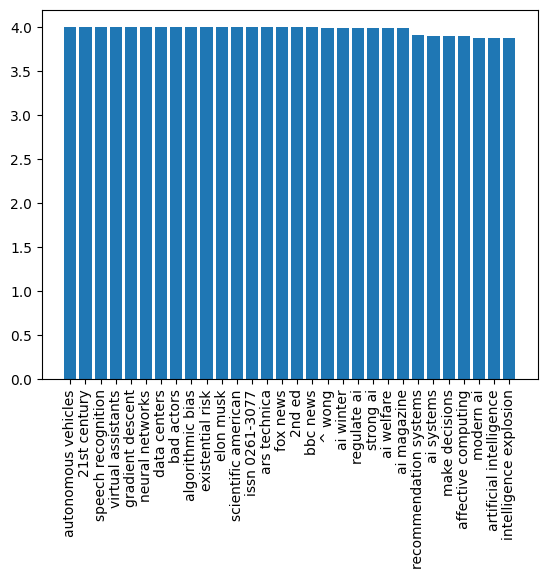

In [13]:
import matplotlib.pyplot as plt


def plot(pair_list):
    k, v = zip(*pair_list)
    plt.bar(range(len(k)), v)
    plt.xticks(range(len(k)), k, rotation="vertical")
    plt.show()


plot(res[:30])

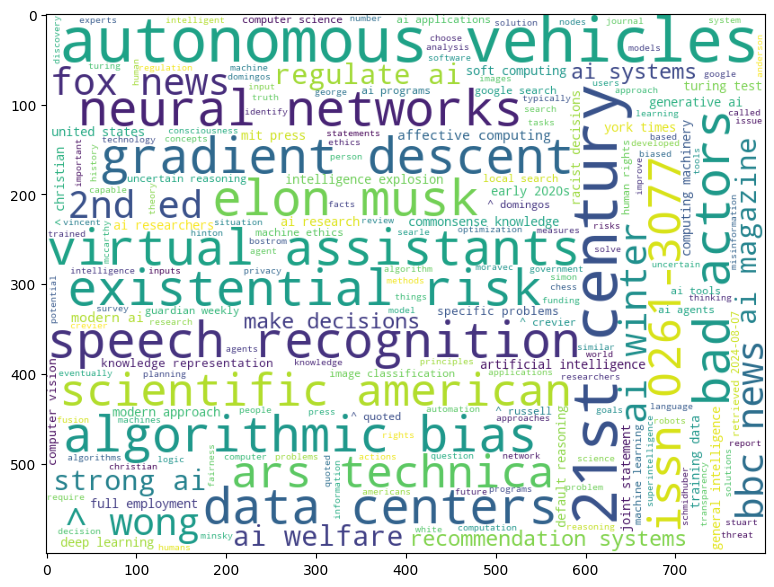

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white", width=800, height=600)
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k: v for k, v in res}))
plt.show()

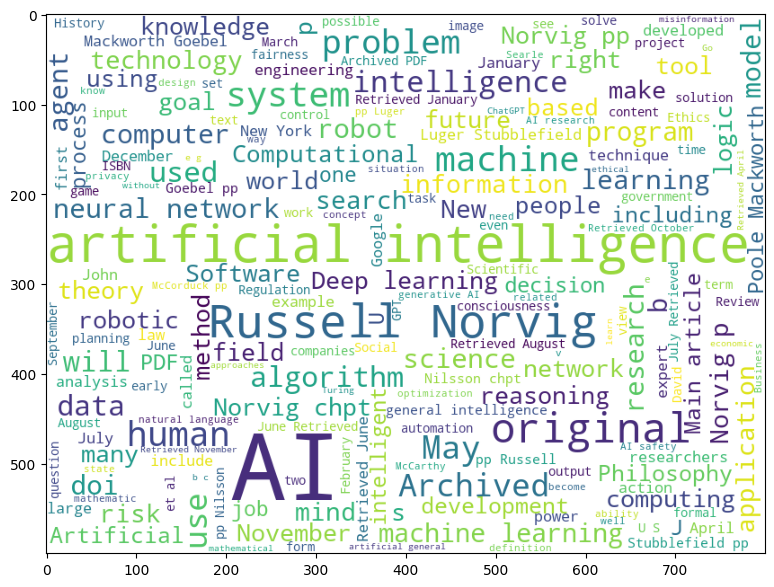

In [16]:
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate(text))
plt.show()